In [1]:
# Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [2]:
# Loading dataset and view a few records.
df = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\diabetes.csv')
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


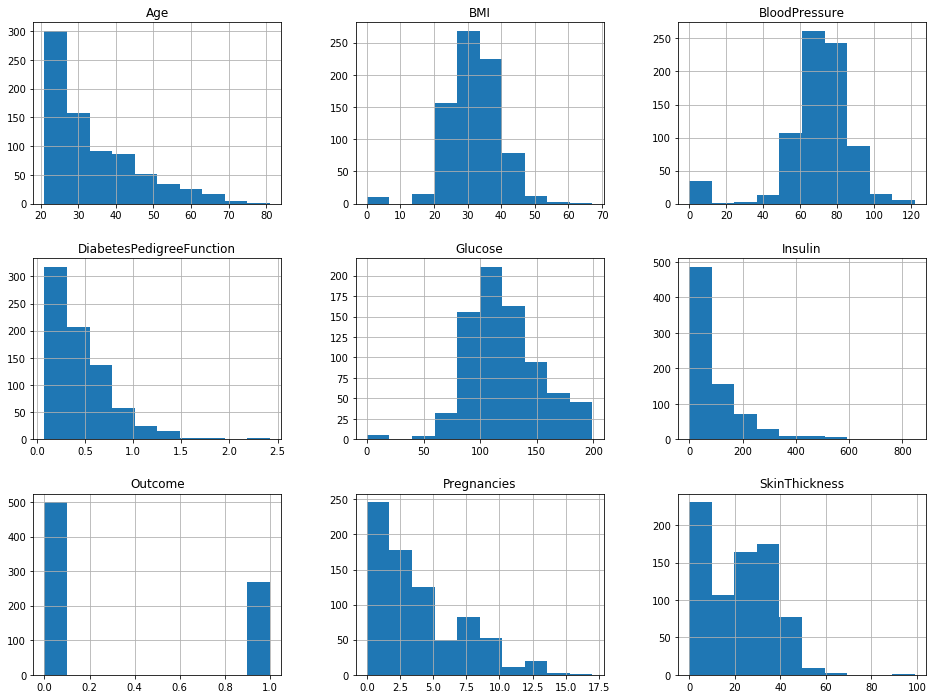

In [8]:
df.hist(figsize=(16,12));

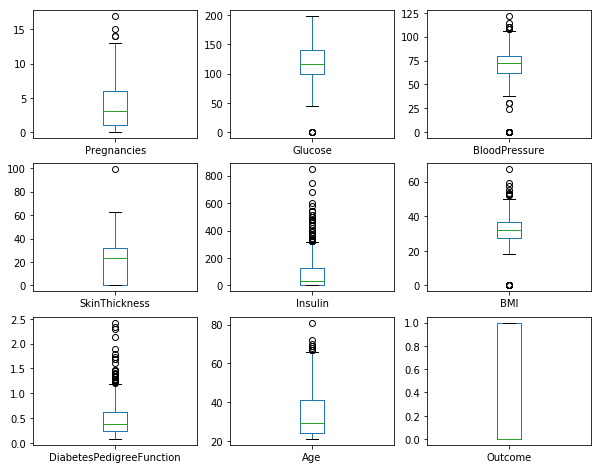

In [9]:
# Observed that spread of attributes is quite different. Attributes Age, 
# Insulin appear to be quite skewed towards smaller values. 
# Scaling on dataset can be applied during data pre-processing.
df.plot(kind= 'box' , 
        subplots=True, 
        layout=(3,3), 
        sharex=False, 
        sharey=False, 
        figsize=(10,8));

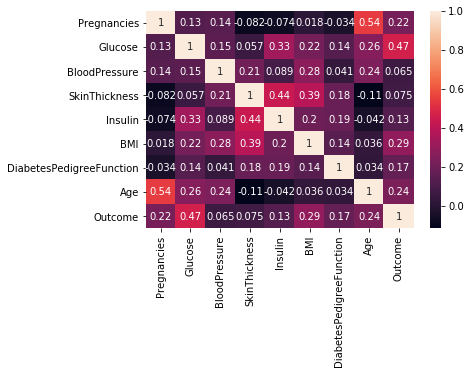

In [10]:
# Correlation plot
# Feature extraction can be tried to observe performance.
Corr=df[df.columns].corr() 
sns.heatmap(Corr, annot=True);

In [11]:
# define X and y
# 0 - No diabetes (NEGATIVE), 1 - has diabetes (POSITIVE)
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = df[feature_cols] 
y= df['Outcome']       

In [12]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [13]:
# train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Find accuracy of models.
results = []
kfold = StratifiedKFold(n_splits=10, random_state=0)
cv_result = cross_val_score(logreg, X_train, y_train, cv = kfold, scoring = "accuracy")
results.append(tuple([cv_result.mean(), cv_result.std()]))

In [15]:
results

[(0.67922448020279869, 0.055163955832193051)]

In [16]:
print('{:2.2f} (+/-) {:2.2f} '.format(results[0][0] * 100, results[0][1] * 100))

67.92 (+/-) 5.52 


In [17]:
# make class predictions for the testing set
# returns 1 or 0 for every instance in the testing set
y_pred_class = logreg.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.720779220779


In [19]:
# CONFUSION MATRIX
# IMP : first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))
confusion = metrics.confusion_matrix(y_test, y_pred_class)

[[99  8]
 [35 12]]


In [20]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [21]:
# metrics from confusion matrix
# Classification accuracy : Overall how often is the classifier correct?
print ((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class))

# classification error : Overall how often is the classifier incorrect?
print((FP+FN)/(TP+TN+FP+FN))
print(1-metrics.accuracy_score(y_test, y_pred_class))

# Sensitivity : when the actual value is +ve, how often is the predication correct
# Also known as "True Positive Rate" or 'Recall"
# should be MAXIMIZED
print (TP/(TP+FN))
print(metrics.recall_score(y_test, y_pred_class))

# Specificity: When the actual value is -ve, how often the prediction correct
# Also known as "Selective"
# should be MAXIMIZED
print(TN/(TN+FP))

# False Positive Rate : when the actual value is negative, how often is the 
# prediction incorrect
# 1- Specificity
print(FP/(FP+TN))

# Precision: when a +ve value is predicted, how often is the prediction correct?
print(TP/(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.720779220779
0.720779220779
0.279220779221
0.279220779221
0.255319148936
0.255319148936
0.92523364486
0.0747663551402
0.6
0.6
